<a href="https://colab.research.google.com/github/R-SIBE/Introduction-to-ML/blob/master/Machine_Learning_(K_Neighbors)-%20Concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#importing relevant libraries
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import mglearn 
from sklearn.datasets import make_blobs
from mglearn.datasets import make_forge

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X Shape:  (26, 2)


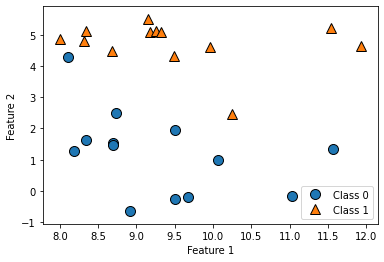

In [27]:
#generate datasets
X,y = mglearn.datasets.make_forge()
#plot datasets
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['Class 0','Class 1'], loc=4)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
shape = format(X.shape)
print("X Shape: ",shape)


(-3.0, 3.0)

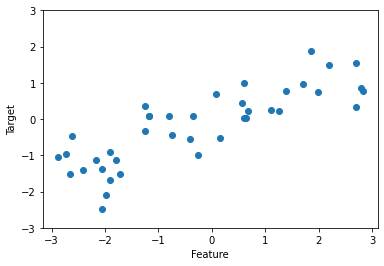

In [13]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.ylim (-3,3)

In [17]:
cancer = load_breast_cancer()
keys = format(cancer.keys())
print("Keys: ",keys)

Keys:  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [22]:
from sklearn.datasets import load_boston
boston = load_boston()
print(format(boston.keys()))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [23]:
X,y = mglearn.datasets.load_extended_boston()
print(format(X.shape))

(506, 104)


In [28]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(y_pred)
print(format(np.mean(y_pred==y_test)))
print("Test Prediction Rate: {:3f}".format(knn.score(X_test,y_test)))

[1 0 1 0 1 0 0]
0.8571428571428571
Test Prediction Rate: 0.857143


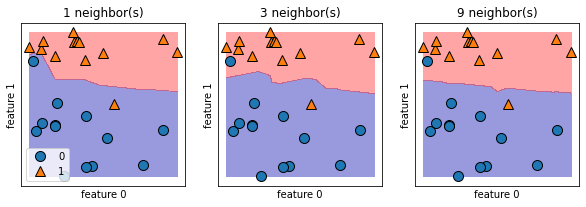

In [34]:
fig, axes = plt.subplots(1,3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
  knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train)
  mglearn.plots.plot_2d_separator(knn,X,fill=True,eps = 0,ax=ax,alpha=.4)
  mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

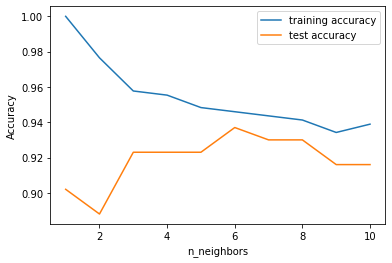

In [41]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer['data'],cancer['target'], stratify = cancer.target, random_state = 66)
training_accuracy =[]
test_accuracy = []
neighbors_settings = range(1,11)
for i in neighbors_settings:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  training_accuracy.append(knn.score(X_train,y_train))
  test_accuracy.append(knn.score(X_test,y_test))
plt.plot(neighbors_settings,training_accuracy, label = 'training accuracy')
plt.plot(neighbors_settings,test_accuracy, label ='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

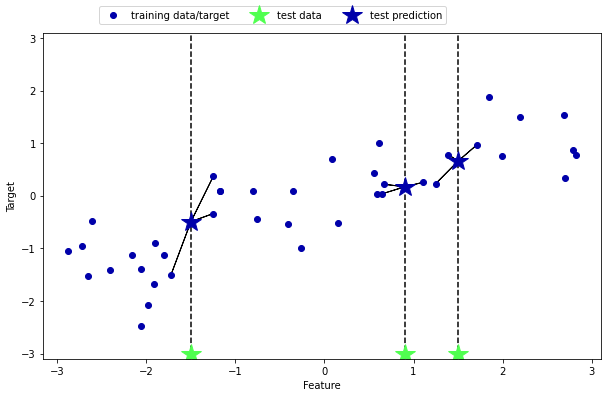

In [43]:
mglearn.plots.plot_knn_regression(n_neighbors=3)